In [1]:
# Importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
#from sklearn import cross_validation, linear_model
from sklearn.model_selection import cross_validate
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


In [2]:
# Lord data set
train_org=pd.read_csv('train.csv')
test_org=pd.read_csv('test.csv')

train=train_org.copy()
test=test_org.copy()


In [3]:
# Checking the dataset size
print('train data set size : ',train.shape)
print('test data set size  : ',test.shape)

train data set size :  (381109, 12)
test data set size  :  (127037, 11)


In [4]:
print('train data set size : ',train.shape)

num_features=[]

for i in train_org.columns:
    if (train_org[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in train_org.columns:
    if (train_org[i].dtype=='object'):
        cat_features.append(i)
        
num_features,cat_features



train data set size :  (381109, 12)


(['id',
  'Age',
  'Driving_License',
  'Region_Code',
  'Previously_Insured',
  'Annual_Premium',
  'Policy_Sales_Channel',
  'Vintage',
  'Response'],
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage'])

In [5]:
train_org.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
test_org.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [8]:
data.shape

(508146, 13)

In [9]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


### Exploratory Data Analysis

In [10]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,381109.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.122563
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


### Check for missing values.

In [11]:
data.isnull().sum() 

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

In [12]:
total = train_org.isnull().sum().sort_values(ascending=False)
percent = (train_org.isnull().sum()/train_org.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(200)

,total,percent
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


In [13]:
total = test_org.isnull().sum().sort_values(ascending=False)
percent = (test_org.isnull().sum()/test_org.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
missing_data.head(200)

,total,percent
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0
Region_Code,0,0.0
Previously_Insured,0,0.0
Vehicle_Age,0,0.0
Vehicle_Damage,0,0.0
Annual_Premium,0,0.0
Policy_Sales_Channel,0,0.0


###  Numerical Features Analysis

In [14]:
num_features=[]

for i in data.columns:
    if (data[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in data.columns:
    if (data[i].dtype=='object'):
        cat_features.append(i)
        
num_features,cat_features

(['id',
  'Age',
  'Driving_License',
  'Region_Code',
  'Previously_Insured',
  'Annual_Premium',
  'Policy_Sales_Channel',
  'Vintage',
  'Response'],
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'source'])

### we no need id column to the model building stage, Therefore we can delete this colomn

In [15]:
data.drop('id',axis=1,inplace=True)

In [16]:
data.shape

(508146, 12)

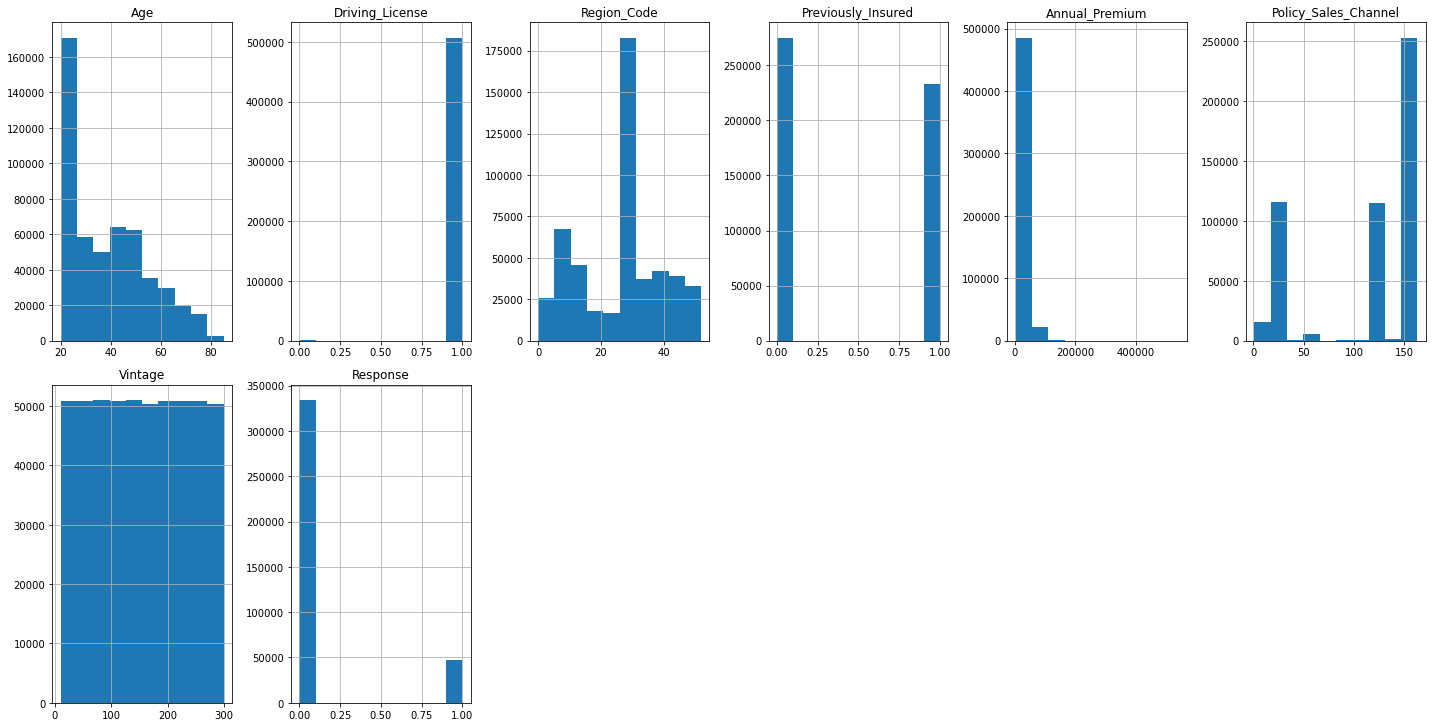

In [17]:
data.hist(figsize=(20,15),layout=(3,6))
plt.tight_layout()
plt.savefig('1_Wholedata.png')
plt.show()

### Response variable has an unbalanced ratio in labels. So we will apply some techniques in the model building stage

In [18]:
data['Driving_License'].value_counts()/len(data)

1    0.997936
0    0.002064
Name: Driving_License, dtype: float64

### As we know that Diriving_license column has an unbalanced ratio between the labels so we can delete this column.

In [19]:
data.drop('Driving_License',axis=1,inplace=True)

In [20]:
data.shape

(508146, 11)

### Categorical Features Analysis

In [21]:
cat_features

['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'source']

In [22]:
data.groupby('Gender')['Response'].mean()

Gender
Female    0.103902
Male      0.138411
Name: Response, dtype: float64

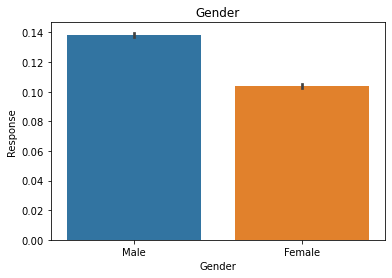

In [23]:
sns.barplot(x='Gender',y='Response',data=data)
plt.title('Gender')
plt.savefig('2_Gender with response.png')
plt.show()

##### We can see that 'Males' are more likely to buy insurance.

In [24]:
data.groupby('Vehicle_Age')['Response'].mean()

Vehicle_Age
1-2 Year     0.173755
< 1 Year     0.043705
> 2 Years    0.293746
Name: Response, dtype: float64

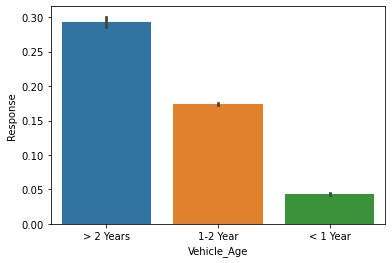

In [25]:
sns.barplot(x='Vehicle_Age',y='Response',data=data)
plt.savefig('3_Vehicle_Age with responce.png')
plt.show()

#### From the above figure it is clear that the more the age of vehicle the better making the vehicle insurance cheaper

In [26]:
data.groupby('Vehicle_Damage')['Response'].mean()

Vehicle_Damage
No     0.005204
Yes    0.237655
Name: Response, dtype: float64

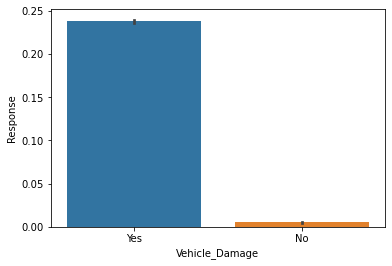

In [27]:
sns.barplot(x='Vehicle_Damage',y='Response',data=data)
plt.savefig('4_Vehicle_Damage with responce.png')
plt.show()

#### From the above figure it is clear that the more vehicle are damage

<AxesSubplot:>

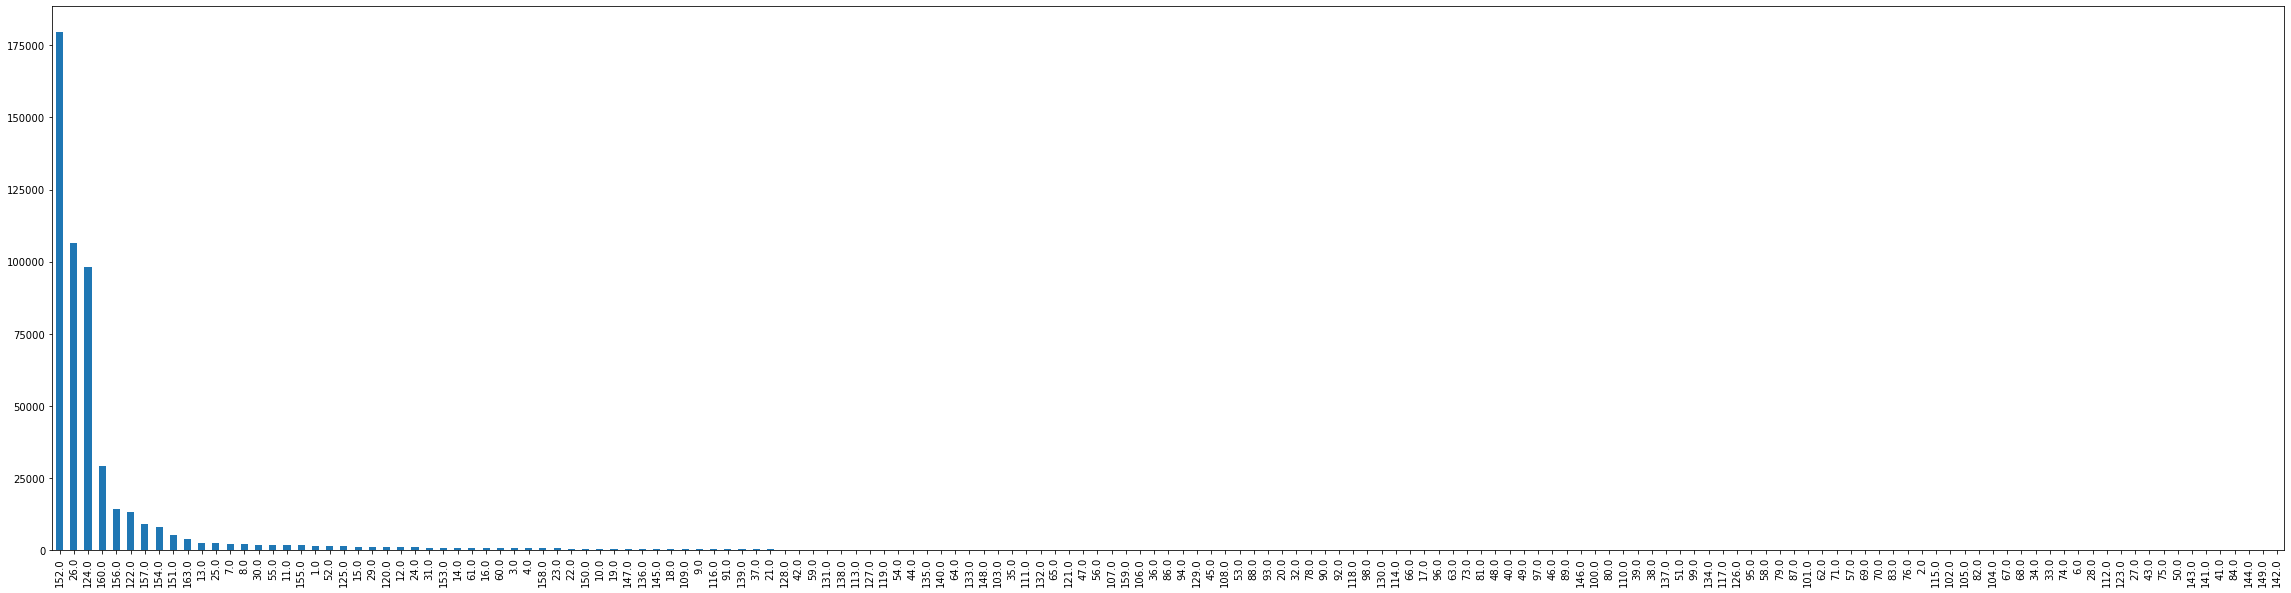

In [28]:
plt.figure(figsize=(40,10))
data['Policy_Sales_Channel'].value_counts().plot.bar()

#### Policy_Sales_Channel no. 152 have higest number of customers

### Data Cleaning

In [29]:
gender_map={'Male':0,'Female':1}

data['Gender']=data['Gender'].map(gender_map)


vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}

data['Vehicle_Age']=data['Vehicle_Age'].map(vehicle_age_map)


Vehicle_Damage_map={'Yes':0,'No':1}

data['Vehicle_Damage']=data['Vehicle_Damage'].map(Vehicle_Damage_map)

In [30]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,0,44,28.0,0,2,0,40454.0,26.0,217,1.0,train
1,0,76,3.0,0,0,1,33536.0,26.0,183,0.0,train
2,0,47,28.0,0,2,0,38294.0,26.0,27,1.0,train
3,0,21,11.0,1,1,1,28619.0,152.0,203,0.0,train
4,1,29,41.0,1,1,1,27496.0,152.0,39,0.0,train


In [31]:
data.shape

(508146, 11)

In [32]:
corr_df=data.corr()

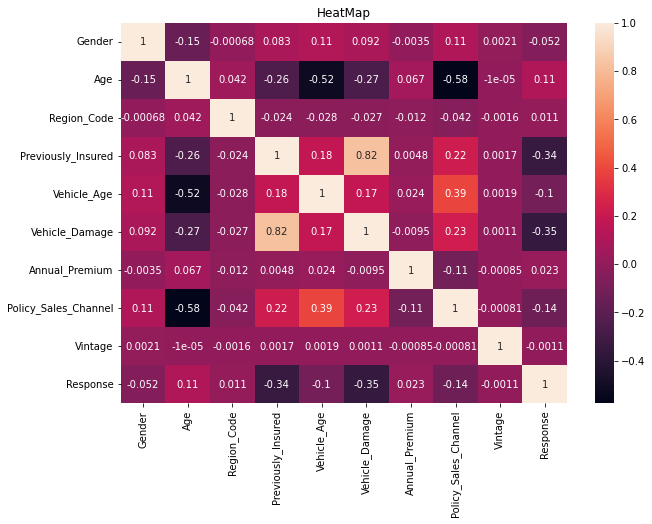

In [33]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_df,annot=True)
plt.title('HeatMap')
plt.savefig('5_correlation.png')

plt.show()

#### We can see that Previously_insured & Vehicle_Damage are both Positively correlated. We will delete column which has strong relation with the Target column

In [34]:
X=data.loc[data['source']=='train',['Age','Annual_Premium','Response']]
y=data.loc[data['source']=='train',['Response']]

# test.drop(['Response'],axis=1,inplace=True) ## For Final Prediction

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [35]:
X.head()

,Age,Annual_Premium,Response
0,44,40454.0,1.0
1,76,33536.0,0.0
2,47,38294.0,1.0
3,21,28619.0,0.0
4,29,27496.0,0.0


In [36]:
y.head()

,Response
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0


In [37]:
x_train.head()

,Age,Annual_Premium,Response
275905,33,41453.0,0.0
195653,22,20089.0,0.0
293289,52,42310.0,0.0
6065,45,2630.0,0.0
18646,25,35506.0,0.0


In [38]:
y_train.head()

,Response
275905,0.0
195653,0.0
293289,0.0
6065,0.0
18646,0.0


In [39]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [40]:
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

DecisionTreeClassifier(max_depth=2)

#### Decision Tree Classifier for Age

In [41]:
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

In [42]:
x_train.head()

,Age,Annual_Premium,Response,Age_tree
275905,33,41453.0,0.0,0.201034
195653,22,20089.0,0.0,0.036814
293289,52,42310.0,0.0,0.201034
6065,45,2630.0,0.0,0.201034
18646,25,35506.0,0.0,0.036814


In [43]:
x_train['Age_tree'].unique()

array([0.2010345 , 0.03681361, 0.08399201, 0.10398756])

<AxesSubplot:xlabel='Age_tree'>

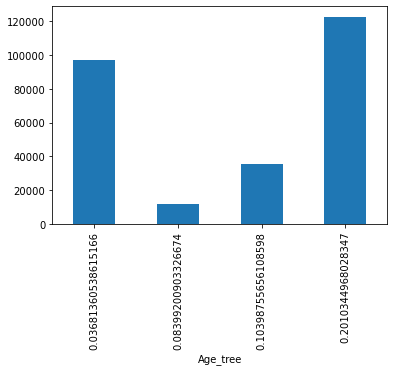

In [44]:
x_train.groupby('Age_tree')['Response'].count().plot.bar()

#### We can see that the new column: Age_tree is a good predictor of the Target. We can use the Predicted_probability to create the Bins.

In [45]:
age_limit=pd.DataFrame({'Min_Age':x_train.groupby('Age_tree')['Age'].min(),'Max_Age':x_train.groupby('Age_tree')['Age'].max()})
age_limit

,Min_Age,Max_Age
Age_tree,,
0.036814,20,27
0.083992,28,29
0.103988,59,85
0.201034,30,58


In [46]:
# pip install pydotplus

In [47]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, x_train.Age.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.653528     0.002830
1      2      0.683938     0.002064
2      3      0.689069     0.002108
3      4      0.695761     0.002520


#### we divide the age column

In [48]:
data.loc[(data['Age']>=20) & (data['Age']<27),'Age_label']='Teenagers' ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age_label']='Young' ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age_label']='Middle Age' ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age_label']='Old Age' ## Old Age

data.loc[(data['Age']>=20) & (data['Age']<27),'Age']=0 ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age']=1 ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age']=2 ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age']=3 ## Old Age

In [49]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source,Age_label
0,0,2,28.0,0,2,0,40454.0,26.0,217,1.0,train,Middle Age
1,0,3,3.0,0,0,1,33536.0,26.0,183,0.0,train,Old Age
2,0,2,28.0,0,2,0,38294.0,26.0,27,1.0,train,Middle Age
3,0,0,11.0,1,1,1,28619.0,152.0,203,0.0,train,Teenagers
4,1,2,41.0,1,1,1,27496.0,152.0,39,0.0,train,Middle Age


C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


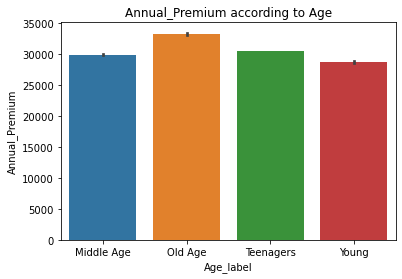

In [50]:
sns.barplot(data['Age_label'],data['Annual_Premium'])

plt.title('Annual_Premium according to Age')

plt.savefig('6_Annual_Premium according to Age.png')


plt.show()

C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


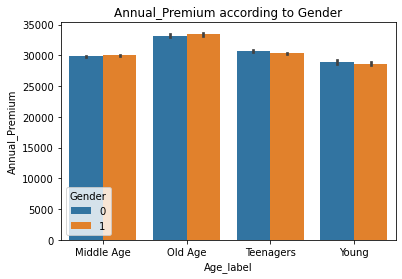

In [51]:
sns.barplot(data['Age_label'],data['Annual_Premium'],hue=data['Gender'])

plt.title('Annual_Premium according to Gender')

plt.savefig('7_Annual_Premium according to Gender.png')


plt.show()

C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_label', ylabel='Annual_Premium'>

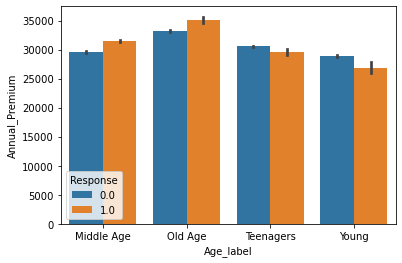

In [52]:
sns.barplot(data['Age_label'],data['Annual_Premium'],hue=data['Response'])

#### We can see that, Age group 20-27 usually do not take Insurance as they are just starting with their lives and may not have money to pay the Premium.

#### Decision Tree Classifier for Annual_Premium

In [53]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train.Annual_Premium.to_frame(),y_train)

x_train['Annual_Premium_tree']=tree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]


In [54]:
x_train['Annual_Premium_tree'].unique()

array([0.14019373, 0.10877935, 0.13156156, 0.15365861])

<AxesSubplot:xlabel='Annual_Premium_tree'>

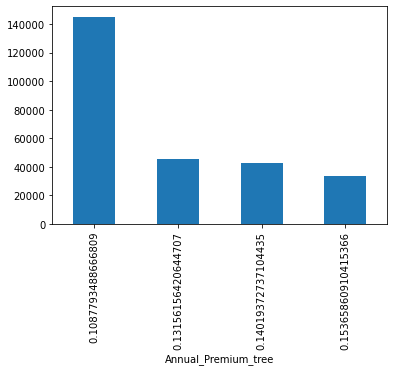

In [55]:
x_train.groupby('Annual_Premium_tree')['Response'].count().plot.bar()

In [56]:
Annual_Premium_tree_limit=pd.concat([x_train.groupby('Annual_Premium_tree')['Annual_Premium'].min(),x_train.groupby('Annual_Premium_tree')['Annual_Premium'].max()],axis=1)
Annual_Premium_tree_limit

,Annual_Premium,Annual_Premium
Annual_Premium_tree,,
0.108779,10004.0,38085.0
0.131562,2630.0,9816.0
0.140194,38086.0,46170.0
0.153659,46171.0,540165.0


In [57]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, x_train.Annual_Premium.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.529599     0.000910
1      2      0.540527     0.000477
2      3      0.547035     0.001000
3      4      0.547878     0.001473


In [58]:
data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium_label']='Low_premium'
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium_label']='Average_premium'
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium_label']='Above_avg_premium'
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium_label']='High_premium'


data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium']=0
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium']=1
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium']=2
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium']=3

In [59]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source,Age_label,Annual_Premium_label
0,0,2,28.0,0,2,0,2.0,26.0,217,1.0,train,Middle Age,Above_avg_premium
1,0,3,3.0,0,0,1,1.0,26.0,183,0.0,train,Old Age,Average_premium
2,0,2,28.0,0,2,0,2.0,26.0,27,1.0,train,Middle Age,Above_avg_premium
3,0,0,11.0,1,1,1,1.0,152.0,203,0.0,train,Teenagers,Average_premium
4,1,2,41.0,1,1,1,1.0,152.0,39,0.0,train,Middle Age,Average_premium


In [60]:
data=pd.get_dummies(data,columns=['Vehicle_Age','Age','Annual_Premium'],drop_first=True)

In [61]:
data.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,source,Age_label,Annual_Premium_label,Vehicle_Age_1,Vehicle_Age_2,Age_1,Age_2,Age_3,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,0,26.0,217,1.0,train,Middle Age,Above_avg_premium,0,1,0,1,0,0,1,0
1,0,3.0,0,1,26.0,183,0.0,train,Old Age,Average_premium,0,0,0,0,1,1,0,0
2,0,28.0,0,0,26.0,27,1.0,train,Middle Age,Above_avg_premium,0,1,0,1,0,0,1,0
3,0,11.0,1,1,152.0,203,0.0,train,Teenagers,Average_premium,1,0,0,0,0,1,0,0
4,1,41.0,1,1,152.0,39,0.0,train,Middle Age,Average_premium,1,0,0,1,0,1,0,0


In [62]:
data.shape

(508146, 18)

In [63]:
#data.to_csv(r"C:\Users\praba\Lab_03_2018E056_EC9560\algorithm selection\cleaned_data.csv", index=False)

In [64]:
# Importing library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [65]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

train.drop(['source','Age_label','Annual_Premium_label'],axis=1,inplace=True)
test.drop(['source','Response','Age_label','Annual_Premium_label'],axis=1,inplace=True)

C:\Users\hiran\AppData\Local\Temp\ipykernel_2756\3601308911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['source','Age_label','Annual_Premium_label'],axis=1,inplace=True)
C:\Users\hiran\AppData\Local\Temp\ipykernel_2756\3601308911.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['source','Response','Age_label','Annual_Premium_label'],axis=1,inplace=True)


In [66]:
test.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Vehicle_Age_1,Vehicle_Age_2,Age_1,Age_2,Age_3,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
381109,0,11.0,1,1,152.0,53,1,0,0,0,0,1,0,0
381110,0,28.0,0,0,7.0,111,0,0,0,1,0,1,0,0
381111,0,28.0,0,0,124.0,199,0,0,0,1,0,0,1,0
381112,0,27.0,1,0,152.0,187,1,0,0,0,0,1,0,0
381113,0,28.0,1,1,152.0,297,1,0,1,0,0,0,0,1


In [67]:
train.head()

,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1,Vehicle_Age_2,Age_1,Age_2,Age_3,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,0,28.0,0,0,26.0,217,1.0,0,1,0,1,0,0,1,0
1,0,3.0,0,1,26.0,183,0.0,0,0,0,0,1,1,0,0
2,0,28.0,0,0,26.0,27,1.0,0,1,0,1,0,0,1,0
3,0,11.0,1,1,152.0,203,0.0,1,0,0,0,0,1,0,0
4,1,41.0,1,1,152.0,39,0.0,1,0,0,1,0,1,0,0


In [68]:
train.shape,test.shape

((381109, 15), (127037, 14))

In [69]:
X=train.drop(['Response'],axis=1)
y=train['Response'].astype('int')

#### before balance

In [70]:
models=[]

models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
models.append(('knn',KNeighborsClassifier()))

In [79]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int32

In [71]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True, random_state=5)
    cv_score=cross_val_score(model,X,y,cv=kf,scoring='accuracy',verbose=1)
    results.append(cv_score)
    names.append(name)
    #acc = model.score(X_test_balanced, y_test_balanced)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std(),)
    print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression: 0.877437 (0.000807)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree: 0.833743 (0.000419)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest: 0.846191 (0.000521)
knn: 0.855682 (0.000419)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.8s finished


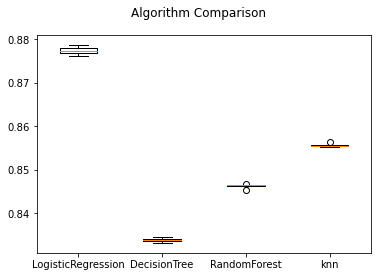

In [72]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig('2_Algorithm Comparison.png')
plt.show()

#### balancing

In [73]:
data['Response'].value_counts()

0.0    334399
1.0     46710
Name: Response, dtype: int64

In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_balanced, y_balanced = smote.fit_resample(X, y)

In [80]:
y_balanced

0         1
1         0
2         1
3         0
4         0
         ..
668793    1
668794    1
668795    1
668796    1
668797    1
Name: Response, Length: 668798, dtype: int32

C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


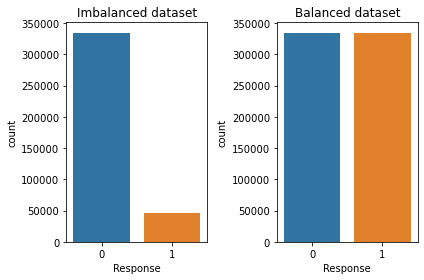

In [75]:
plt.subplot(121)
sns.countplot(y)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_balanced)
plt.title('Balanced dataset')

plt.savefig('1_Imbalanced amd Balanced dataset.png')
plt.tight_layout()
plt.show()

In [82]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True, random_state=5)
    cv_score=cross_val_score(model,X_balanced, y_balanced,cv=kf,scoring='accuracy',verbose=1)
    results.append(cv_score)
    names.append(name)
    #acc = model.score(X_test_balanced, y_test_balanced)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std(),)
    print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression: 0.824448 (0.000849)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree: 0.882222 (0.000907)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest: 0.888984 (0.000763)
knn: 0.804621 (0.001009)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


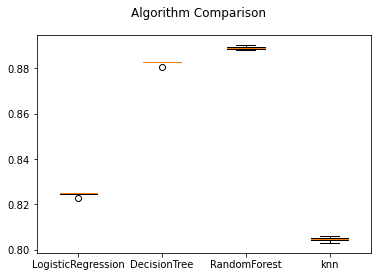

In [83]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig('2_Algorithm Comparison.png')
plt.show()

In [84]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True, random_state=5)
    cv_score=cross_val_score(model,X_balanced,y_balanced,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    #acc = model.score(X_test_balanced, y_test_balanced)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std(),)
    print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression: 0.894775 (0.000842)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree: 0.897837 (0.000967)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest: 0.949702 (0.000404)
knn: 0.887953 (0.000927)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   49.5s finished


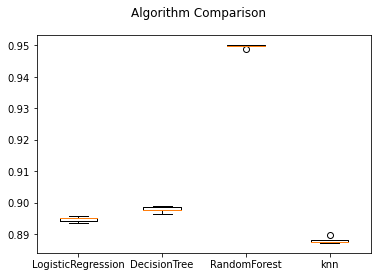

In [85]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig('2_Algorithm Comparison.png')
plt.show()

In [90]:
# define the model
CROSS_MODEL_1 = RandomForestClassifier()
# evaluate the model
kf = KFold(n_splits=5, shuffle=True, random_state=5)
n_scores = cross_val_score(model,X_balanced,y_balanced, scoring='accuracy', cv=kf)
# report performance
print('Accuracy: %f (%f)' % (n_scores.mean(), n_scores.std()))


Accuracy: 0.804621 (0.001009)


In [87]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100],
   'max_features': [2, 3,5],
   'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
kf=KFold(n_splits=2,shuffle=True, random_state=5)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf, n_jobs = -1, verbose = 2)
CROSS_MODEL = grid_search.fit(X_balanced,y_balanced)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


In [88]:
grid_search.best_params_

{'max_depth': 90, 'max_features': 5, 'n_estimators': 300}

In [89]:
grid_search.best_score_

0.8796333123005751

In [91]:
PREDSTEST = CROSS_MODEL.predict(test)
PREDSTEST

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
test_org=pd.read_csv('test.CSV')

In [95]:
submisstion = pd.DataFrame({"id": test_org['id'], "Response":PREDSTEST})
submisstion.to_csv('CROSS_SELL_PREDICTION_SUBMISSION.CSV', index = False)